# Data Cleaning & Feature Engineering — Superstore

## Objetivo
Este projeto tem como objetivo analisar dados de vendas de uma rede varejista,
explorando padrões de consumo, comportamento por categoria e eficiência logística.
O foco está em estatística descritiva e criação de features de negócio.

## Importação de Bibliotecas

In [1]:
# Importando as bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Dataset

O dataset contém aproximadamente 9.800 registros de pedidos, incluindo informações
sobre datas de compra e envio, categorias de produtos, localização e valores de venda.

## Carregamento e Inspeção Inicial

In [2]:
# Carregando o dataset
df = pd.read_csv("superstore.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isna().sum().sort_values(ascending=False)

,0
Postal Code,11
Row ID,0
Order ID,0
Order Date,0
Ship Mode,0
Ship Date,0
Customer Name,0
Segment,0
Country,0
Customer ID,0


## Limpeza e Preparação dos Dados

Conversão de datas

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)

## Criação de Features

Criando features temporais

In [8]:
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Order Weekday"] = df["Order Date"].dt.weekday

Criando features de negócio

In [11]:
# Feature de tempo de entrega
# Todo pedido deveria ter delivery time ≥ 0?
df["Delivery Time"] = (df["Ship Date"] - df["Order Date"]).dt.days

In [13]:
# Feature de ticket médio por pedido

avg_ticket = df.groupby("Order ID")["Sales"].sum().reset_index()
avg_ticket.rename(columns={"Sales": "Order Total"}, inplace=True)
df = df.merge(avg_ticket, on="Order ID", how="left")

In [14]:
# Feature de análise por categoria e segmento

df.groupby("Category")["Sales"].agg(["mean", "median", "sum"])

,mean,median,sum
Category,,,
Furniture,350.653790,182.610,728658.5757
Office Supplies,119.381001,27.360,705422.3340
Technology,456.401474,167.944,827455.8730


Embora seja comum analisar margem de lucro, este dataset não disponibiliza
informações de custo ou lucro. Portanto, o foco da análise foi direcionado
para padrões de vendas, comportamento por categoria e eficiência logística.

## Validação das Features
As features criadas foram validadas por meio de regras de negócio,
análise estatística e testes de consistência.

### Verificando Inconsistências

In [29]:
# Existem vendas zeradas ou negativas no dataset?
df[df["Sales"] <= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Weekday,Delivery Time,Order Total


Não foram identificados registros com vendas nulas ou negativas, indicando
consistência nos valores financeiros do dataset.


In [30]:
# Qual o tempo médio de entrega?
# Qual a mediana (mais representativa)?
# Existem entregas no mesmo dia?
# Qual o máximo observado?

df["Delivery Time"].describe()

,Delivery Time
count,9800.000000
mean,3.961122
std,1.749614
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


O tempo médio de entrega é de aproximadamente 3.96 dias, com mediana 4, indicando distribuição relativamente estável. Foram observados casos de entrega no mesmo dia, bem como alguns valores extremos.


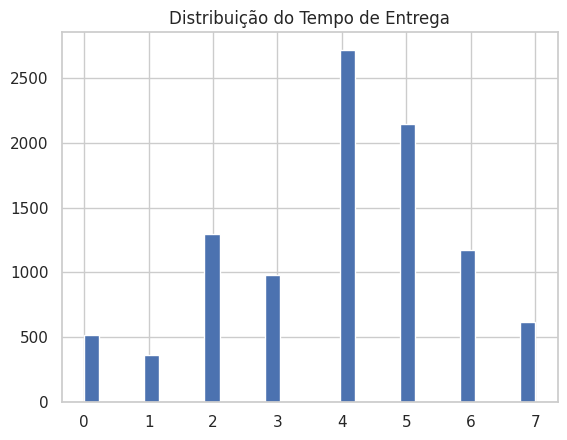

In [19]:
# Qual o tempo médio de entrega?
# Existe entrega no mesmo dia (0)?
# Existem outliers fora do comum?

plt.figure()
df["Delivery Time"].hist(bins=30)
plt.title("Distribuição do Tempo de Entrega")
plt.show()

A maioria das entregas ocorre entre 3 e 6 dias, com concentração em torno de 4 dias,
indicando um prazo logístico relativamente consistente.


In [31]:
# Ticket por pedido - Order Total
# O total do pedido é menor do que algum item vendido nele?
check = df.groupby("Order ID").agg(
    order_total=("Order Total", "first"),
    max_item=("Sales", "max")
)

check[check["order_total"] < check["max_item"]]



,order_total,max_item
Order ID,,


A validação confirmou que, em todos os pedidos, o valor total é maior ou igual
ao item de maior valor, indicando consistência no cálculo do ticket médio.


In [32]:
# Quantas linhas existem por pedido?
df["Order ID"].value_counts().head()

,count
Order ID,
CA-2018-100111,14
CA-2018-157987,12
US-2017-108504,11
CA-2017-165330,11
US-2016-126977,10


A contagem de registros por Order ID confirma que os pedidos são compostos
por múltiplos itens, justificando o cálculo do valor total por pedido.


In [33]:
# Cada pedido possui apenas um valor de Order Total?
df.groupby("Order ID")["Order Total"].nunique().value_counts()

,count
Order Total,
1,4922


Foi verificado que cada Order ID possui um único valor de Order Total,
indicando que não houve duplicações após a operação de merge.

### Consistência de Agregação

In [34]:
# As agregações preservam o total do dataset?
df.groupby("Category")["Sales"].sum().sum() == df["Sales"].sum()


np.True_

In [27]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [28]:
df.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Weekday,Delivery Time,Order Total
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,...,9800,9800,9800,9800,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
unique,NaN,4922,NaN,NaN,4,793,793,3,1,529,...,1861,3,17,1849,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2018-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5859,35,35,5101,9800,891,...,19,5909,1492,47,NaN,NaN,NaN,NaN,NaN,NaN
mean,4900.500000,NaN,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.769059,2016.724184,7.818469,2.993673,3.961122,714.068896
min,1.000000,NaN,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,2015.000000,1.000000,0.000000,0.000000,0.556000
25%,2450.750000,NaN,2016-05-24 00:00:00,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.248000,2016.000000,5.000000,1.000000,3.000000,85.503000
50%,4900.500000,NaN,2017-06-26 00:00:00,2017-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54.490000,2017.000000,9.000000,3.000000,4.000000,318.293000
75%,7350.250000,NaN,2018-05-15 00:00:00,2018-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,210.605000,2018.000000,11.000000,5.000000,5.000000,829.932500
max,9800.000000,NaN,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22638.480000,2018.000000,12.000000,6.000000,7.000000,23661.228000


Foram identificados pedidos com valores significativamente superiores à média.
Esses casos representam compras com múltiplos itens e grande volume, comuns
em segmentos corporativos, e não foram tratados como erro.


As features criadas foram validadas por meio de regras de negócio,
análise estatística e testes de consistência matemática. Foram verificados
casos de valores negativos, duplicações após merge e coerência entre totais
e agregações.


## Conclusão

Este projeto explorou dados de vendas de uma rede varejista com foco em análise
exploratória e criação de features de negócio. Foi identificada uma forte
concentração de vendas em valores baixos, com presença de outliers relevantes,
especialmente na categoria Technology.

A análise do tempo de entrega mostrou um padrão consistente entre 3 e 6 dias,
indicando estabilidade logística. As features criadas foram validadas por meio
de regras de negócio e testes de consistência, garantindo confiabilidade
nos resultados apresentados.

## Limitações

- O dataset não possui informações de custo ou lucro, impossibilitando análises
  de margem.
- Alguns pedidos não apresentam data de envio, resultando em valores ausentes
  para o tempo de entrega.
- A análise é descritiva e não inclui modelos preditivos.

## Próximas Etapas

- Analisar padrões de vendas por região e segmento
- Explorar sazonalidade ao longo do tempo
- Construir modelos preditivos simples de vendas
